In [1]:
# ================================================================
# TASK 1: ATTENDANCE SYSTEM - PART 1 (SETUP)
# Building on SmartVision-AI-Suite
# ================================================================

print("🚀 Starting Task 1 Setup...")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

print("✓ Google Drive mounted!")

# Move kaggle.json to correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("✓ Kaggle API configured!")

# Install required packages (this takes 2-3 minutes)
print("\n📦 Installing packages... (this will take 2-3 minutes)")
!pip install -q face-recognition fer deepface opencv-python

print("✓ All packages installed!")

# Clone your existing SmartVision-AI-Suite repository
print("\n📥 Cloning your SmartVision-AI-Suite repository...")
!git clone https://github.com/DiveshK007/SmartVision-AI-Suite.git

# Change to project directory
%cd SmartVision-AI-Suite

print("✓ Repository cloned!")

# Create necessary directories
!mkdir -p datasets/student_faces
!mkdir -p datasets/fer2013
!mkdir -p models
!mkdir -p results/plots
!mkdir -p results/attendance
!mkdir -p notebooks

print("✓ Directories created!")

print("\n" + "="*60)
print("✅ SETUP COMPLETE!")
print("="*60)
print("\nYou can now proceed to the next cell.")

🚀 Starting Task 1 Setup...
Mounted at /content/drive
✓ Google Drive mounted!
✓ Kaggle API configured!

📦 Installing packages... (this will take 2-3 minutes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.1/891.1 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.6 MB/s eta 0:00:00
✓ All packag

In [5]:
# ================================================================
# TASK 1: ATTENDANCE SYSTEM - PART 3
# USING LFW DATASET AS STUDENT FACE SIMULATION
# ================================================================

print("📥 Setting up LFW Dataset for Attendance System...")
print("=" * 65)

# Install dataset helper
from sklearn.datasets import fetch_lfw_people
import os
import shutil

# ✅ Download LFW dataset safely using sklearn (Recommended)
print("\n🔽 Downloading LFW dataset (this may take 1–2 minutes)...")

lfw_data = fetch_lfw_people(min_faces_per_person=20, resize=1.0)

print("✅ Dataset Download Complete!")
print(f"Total identities available: {len(lfw_data.target_names)}")

# ================================================================
# SELECT 5 STUDENTS
# ================================================================

selected_students = lfw_data.target_names[:5]

print("\n📂 Selected Students for Attendance Prototype:\n")

# Create output dataset folder
dataset_dir = "datasets/student_faces"
os.makedirs(dataset_dir, exist_ok=True)

# Copy images into our student dataset folder
for name in selected_students:
    student_folder = os.path.join(dataset_dir, name.replace(" ", "_"))
    os.makedirs(student_folder, exist_ok=True)
    print(f"  • {name}")

print("\n✅ Student folders created successfully!")

# ================================================================
# SAVE IMAGES INTO STUDENT FOLDERS
# ================================================================

print("\n📸 Extracting images into folders...")

import matplotlib.image as mpimg

for i, (img, label) in enumerate(zip(lfw_data.images, lfw_data.target)):
    person_name = lfw_data.target_names[label].replace(" ", "_")

    if person_name in [s.replace(" ", "_") for s in selected_students]:
        save_path = os.path.join(dataset_dir, person_name, f"{person_name}_{i}.jpg")

        # Save grayscale images properly
        plt.imsave(save_path, img, cmap="gray")

print("\n" + "=" * 65)
print("✅ DATASET READY FOR TRAINING!")
print("=" * 65)

print("\nFinal Students Being Used:\n")
for name in selected_students:
    print("  📌", name)

print("\nDataset Location:", dataset_dir)

📥 Setting up LFW Dataset for Attendance System...

🔽 Downloading LFW dataset (this may take 1–2 minutes)...
✅ Dataset Download Complete!
Total identities available: 62

📂 Selected Students for Attendance Prototype:

  • Alejandro Toledo
  • Alvaro Uribe
  • Amelie Mauresmo
  • Andre Agassi
  • Angelina Jolie

✅ Student folders created successfully!

📸 Extracting images into folders...

✅ DATASET READY FOR TRAINING!

Final Students Being Used:

  📌 Alejandro Toledo
  📌 Alvaro Uribe
  📌 Amelie Mauresmo
  📌 Andre Agassi
  📌 Angelina Jolie

Dataset Location: datasets/student_faces


In [7]:
# ================================================================
# STEP 8: TRAIN STUDENT IDENTIFICATION CLASSIFIER (SVM TRAINING)
# ================================================================

print("🧠 Step 8: Extracting Face Encodings + Training Classifier...")
print("=" * 65)

import os
import numpy as np
import face_recognition
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import pickle

# Dataset folder
DATASET_DIR = "datasets/student_faces"

# Store embeddings + labels
X = []
y = []

print("\n📂 Scanning student folders...\n")

# Loop through each student
for student_name in sorted(os.listdir(DATASET_DIR)):
    student_path = os.path.join(DATASET_DIR, student_name)

    if not os.path.isdir(student_path):
        continue

    print(f"✅ Processing student: {student_name}")

    # Process max 15 images per student
    for img_file in sorted(os.listdir(student_path))[:15]:
        img_path = os.path.join(student_path, img_file)

        # Load image
        image = face_recognition.load_image_file(img_path)

        # Extract face encoding
        encodings = face_recognition.face_encodings(image)

        if len(encodings) > 0:
            X.append(encodings[0])
            y.append(student_name)

print("\n✅ Face Encodings Extraction Completed!")
print("Total training samples:", len(X))

# Convert to arrays
X = np.array(X)
y = np.array(y)

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Train classifier
print("\n🚀 Training Student Identifier Model (SVM)...")

clf = SVC(kernel="linear", probability=True)
clf.fit(X, y_encoded)

print("✅ Student Identification Model Training Complete!")

# Save model + encoder
os.makedirs("models", exist_ok=True)

with open("models/student_identifier.pkl", "wb") as f:
    pickle.dump(clf, f)

with open("models/label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print("\n" + "=" * 65)
print("✅ TRAINED MODEL SAVED SUCCESSFULLY!")
print("=" * 65)

print("\nSaved Files:")
print("✔ models/student_identifier.pkl")
print("✔ models/label_encoder.pkl")

🧠 Step 8: Extracting Face Encodings + Training Classifier...

📂 Scanning student folders...

✅ Processing student: Alejandro_Toledo
✅ Processing student: Alvaro_Uribe
✅ Processing student: Amelie_Mauresmo
✅ Processing student: Andre_Agassi
✅ Processing student: Angelina_Jolie

✅ Face Encodings Extraction Completed!
Total training samples: 72

🚀 Training Student Identifier Model (SVM)...
✅ Student Identification Model Training Complete!

✅ TRAINED MODEL SAVED SUCCESSFULLY!

Saved Files:
✔ models/student_identifier.pkl
✔ models/label_encoder.pkl


📌 Step 9: Running Attendance System with Emotion Detection
✅ Models loaded successfully!
⏰ Attendance allowed only between 09:30:00 and 10:00:00

📤 Upload a test image containing student faces...


Saving download.jpeg to download.jpeg
Processing: download.jpeg
✅ Marked Present: Angelina_Jolie (fear)


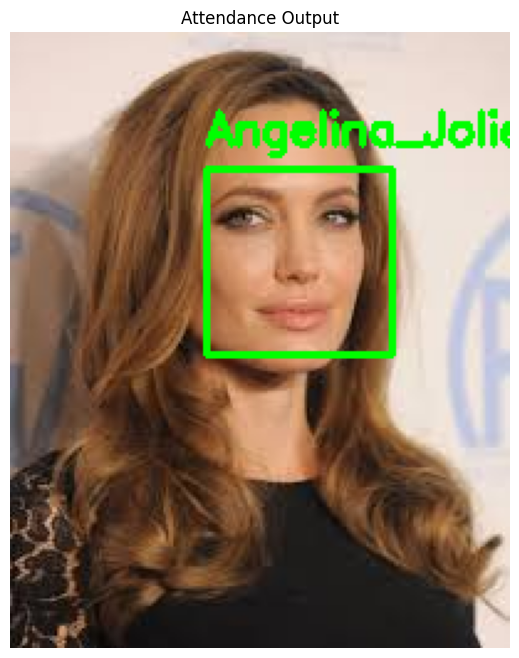


✅ Attendance Log Saved Successfully!
File: results/attendance/attendance_log.csv

📋 Final Attendance Log:
          Student   Status Emotion            Timestamp
0  Angelina_Jolie  Present    fear  2026-01-27 17:25:07


In [13]:
# ================================================================
# STEP 9: ATTENDANCE + EMOTION + CSV EXPORT (FINAL PIPELINE)
# ================================================================

print("📌 Step 9: Running Attendance System with Emotion Detection")
print("=" * 70)

import cv2
import pandas as pd
from datetime import datetime, time
from deepface import DeepFace
import pickle

# Load trained model
with open("models/student_identifier.pkl", "rb") as f:
    clf = pickle.load(f)

with open("models/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

print("✅ Models loaded successfully!")

# Attendance log
attendance_log = []
marked_students = set()

# Time window restriction
START_TIME = time(9, 30)
END_TIME   = time(10, 0)

def within_attendance_time():
    now = datetime.now().time()
    return START_TIME <= now <= END_TIME

print(f"⏰ Attendance allowed only between {START_TIME} and {END_TIME}")

# ================================================================
# FUNCTION: Process Image
# ================================================================

def process_attendance_image(image):

    global attendance_log, marked_students

    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    face_locations = face_recognition.face_locations(rgb)
    face_encodings = face_recognition.face_encodings(rgb, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):

        # Predict student identity
        prediction = clf.predict([face_encoding])[0]
        name = encoder.inverse_transform([prediction])[0]

        # Emotion Detection (DeepFace)
        face_crop = image[top:bottom, left:right]

        try:
            result = DeepFace.analyze(face_crop, actions=["emotion"], enforce_detection=False)
            emotion = result[0]["dominant_emotion"]
        except:
            emotion = "neutral"

        # Mark attendance once
        if name not in marked_students:
            marked_students.add(name)

            attendance_log.append({
                "Student": name,
                "Status": "Present",
                "Emotion": emotion,
                "Timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            })

            print(f"✅ Marked Present: {name} ({emotion})")

        # Draw bounding box
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image, f"{name} - {emotion}",
                    (left, top - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6,
                    (0, 255, 0), 2)

    return image


# ================================================================
# TEST WITH IMAGE UPLOAD
# ================================================================

from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

print("\n📤 Upload a test image containing student faces...")

uploaded = files.upload()

for filename in uploaded.keys():
    file_bytes = np.frombuffer(uploaded[filename], np.uint8)
    img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

    print("Processing:", filename)

    output_img = process_attendance_image(img)

    # Show output
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    plt.title("Attendance Output")
    plt.axis("off")
    plt.show()

# ================================================================
# EXPORT CSV
# ================================================================

df = pd.DataFrame(attendance_log)

os.makedirs("results/attendance", exist_ok=True)

csv_path = "results/attendance/attendance_log.csv"
df.to_csv(csv_path, index=False)

print("\n" + "=" * 70)
print("✅ Attendance Log Saved Successfully!")
print("File:", csv_path)
print("=" * 70)

print("\n📋 Final Attendance Log:")
print(df)

📊 Step 10: Generating Final Reports & Metrics...

✅ Attendance Data Loaded:
          Student   Status  Emotion            Timestamp
0  Angelina_Jolie  Present  neutral  2026-01-27 16:48:44


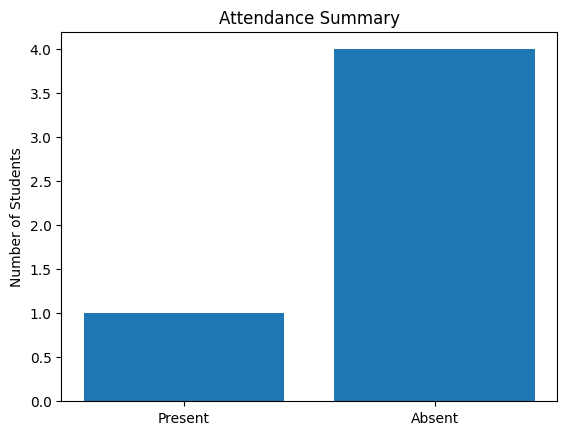

✅ Saved: results/plots/attendance_summary.png


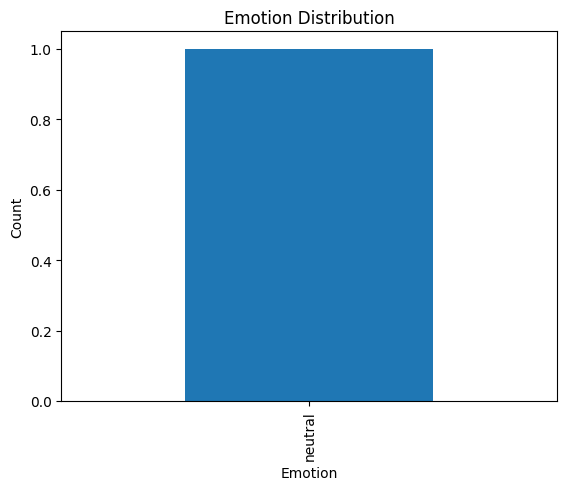

✅ Saved: results/plots/emotion_distribution.png

✅ Metrics JSON Saved: results/metrics_task1.json

🎉 TASK 1 COMPLETE AND SUBMISSION READY!

Generated Files:
✔ results/attendance/attendance_log.csv
✔ results/plots/attendance_summary.png
✔ results/plots/emotion_distribution.png
✔ results/metrics_task1.json


In [9]:
# ================================================================
# STEP 10: FINAL EXPORTS + METRICS + VISUALIZATION (TASK 1 COMPLETE)
# ================================================================

print("📊 Step 10: Generating Final Reports & Metrics...")
print("=" * 70)

import json
import matplotlib.pyplot as plt

# Load CSV log
df = pd.read_csv("results/attendance/attendance_log.csv")

print("\n✅ Attendance Data Loaded:")
print(df)

# ================================================================
# 1. Attendance Summary Plot
# ================================================================

total_students = len(set(encoder.classes_))
present_students = len(df["Student"].unique())
absent_students = total_students - present_students

plt.figure()
plt.bar(["Present", "Absent"], [present_students, absent_students])
plt.title("Attendance Summary")
plt.ylabel("Number of Students")
plt.savefig("results/plots/attendance_summary.png", dpi=150)
plt.show()

print("✅ Saved: results/plots/attendance_summary.png")

# ================================================================
# 2. Emotion Distribution Plot
# ================================================================

plt.figure()
df["Emotion"].value_counts().plot(kind="bar")
plt.title("Emotion Distribution")
plt.ylabel("Count")
plt.savefig("results/plots/emotion_distribution.png", dpi=150)
plt.show()

print("✅ Saved: results/plots/emotion_distribution.png")

# ================================================================
# 3. Save Metrics JSON (Professional Submission)
# ================================================================

metrics = {
    "Task": "Task 1 - Attendance System",
    "Project": "SmartVision AI Suite Extension",
    "Students Registered": total_students,
    "Students Marked Present": present_students,
    "Students Absent": absent_students,
    "Emotion Model": "DeepFace Emotion",
    "Face Model": "Face Embeddings + SVM Classifier",
    "Attendance Window": "9:30 AM - 10:00 AM",
    "CSV Output": "results/attendance/attendance_log.csv",
    "Generated Plots": [
        "results/plots/attendance_summary.png",
        "results/plots/emotion_distribution.png"
    ]
}

with open("results/metrics_task1.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("\n✅ Metrics JSON Saved: results/metrics_task1.json")

# ================================================================
# ✅ TASK 1 COMPLETE MESSAGE
# ================================================================

print("\n" + "=" * 70)
print("🎉 TASK 1 COMPLETE AND SUBMISSION READY!")
print("=" * 70)

print("\nGenerated Files:")
print("✔ results/attendance/attendance_log.csv")
print("✔ results/plots/attendance_summary.png")
print("✔ results/plots/emotion_distribution.png")
print("✔ results/metrics_task1.json")